# Principal Component Analysis

This notebook demonstrates Principal Component Analysis (PCA), a technique for dimensionality reduction and data visualization.

It is useful in situations when your data contains too many columns to visualize in its entirety, but you would like to try visualizing it anyway. The techniuque results in a visualization that is difficult to interpret, but which gives a view of the entirety of the data that contains the most information. In many cases, this view is a good-enough approximation of the dataset, and is suitable for visualizing in 2 dimensions.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/iris/iris_train.csv")

In [ ]:
# Let's take another look at the Iris dataset. The dataset contains 4 columns.
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.9,3.1,5.1,2.3,Iris-virginica
1,6.2,2.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,5.4,2.1,Iris-virginica
3,5.4,3.9,1.3,0.4,Iris-setosa
4,5.1,3.5,1.4,0.2,Iris-setosa
...,...,...,...,...,...
109,5.9,3.0,4.2,1.5,Iris-versicolor
110,7.2,3.6,6.1,2.5,Iris-virginica
111,6.0,2.7,5.1,1.6,Iris-versicolor
112,5.0,3.3,1.4,0.2,Iris-setosa


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

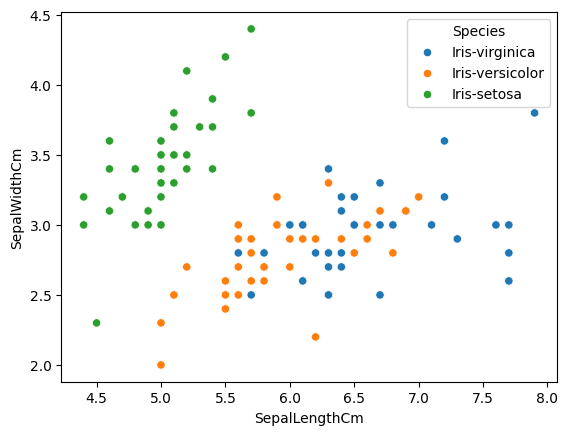

In [ ]:
# A scatterplot is a useful way to visualize the dataset. However, in order
# to produce a scatterplot, we have to choose 2 of the available 4 columns.
#
# Here is a scatterplot of sepal measurements:
sns.scatterplot(df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

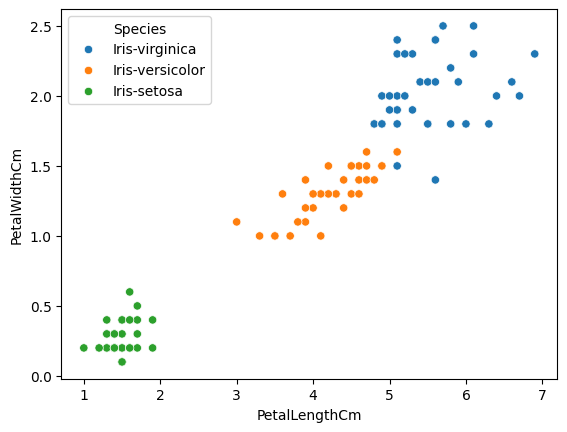

In [ ]:
# An here is a scatterplot of petal measurements:
sns.scatterplot(df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')

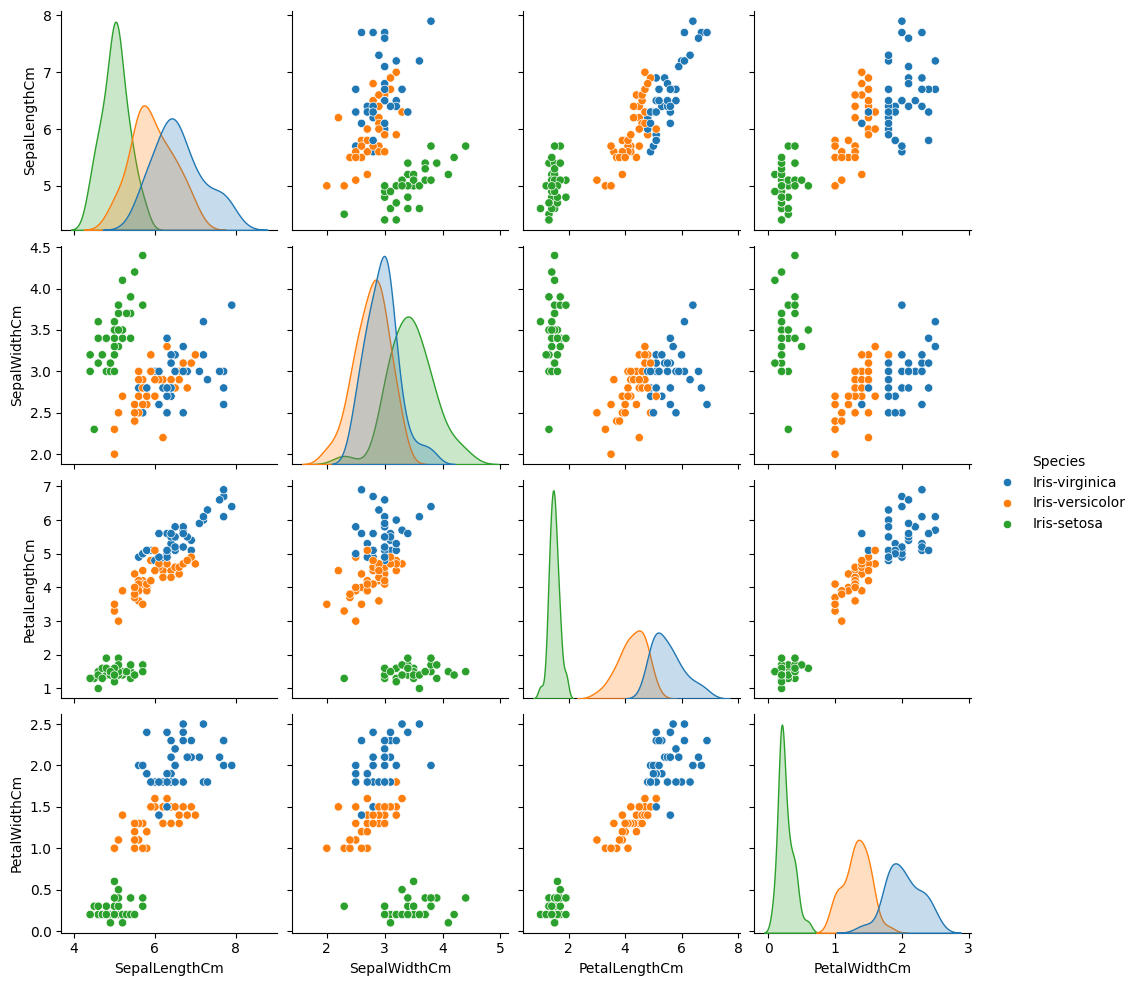

In [ ]:
# These visualizations are useful, but each shows us only a portion of the
# available data. If we want to see a complete visualization that shows all possible
# ways of looking at the data, we can't do it. The best we have is the Seaborn
# pair plot, which shows us every possible pairing of columns:
sns.pairplot(df, hue='Species')

In [ ]:
# A pair plot is useful for a variety of tasks. For example, it shows us where
# interesting linear relationships exist (which we can further investigate with
# a correlation matrix or with targeted Pearson R tests). More broadly, if we
# are interested in what different species of iris looks like, (this is especially
# relevant for tasks like clustering and classification), the pair plot gives us
# many ways to look at our data. For example, there are clear separations between
# species when viewing petal width vs. petal length, but unclear separations
# between species when viewing sepal width vs sepal length, and everything
# in between.
#
# However, this is still just a combination of 2-D scatter plots, and is not a
# single view into the structure of the data. Additionally, pair plots are only
# feasible with smaller datasets. The iris dataset only has 4 numeric columns.
# What if we were looking at a dataset with tens, hundreds, or thousands of
# numeric columns? A pair plot would eventually become too big to be useful.

In [ ]:
# In situations where we want a singular view into many columns, Principal Component
# Analysis (PCA) is useful. As stated in the introduction, it is a method of
# dimensionality reduction. How it works is shown in the lecture slides.
#
# Here is how to use PCA. Note that the output of PCA is 4-dimensional, just
# like the number of input columns. However, each of the dimensions is not
# a column, but a principal component: a view of the data which contains the highest
# variance. The second principal component contains the second highest amount of
# variance, the third principal component contains the third highest amount of
# variance, and so on.
input_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

pca = PCA()
pca_output = pca.fit_transform(df[input_cols])
pca_output.shape

(114, 4)

In [ ]:
# We can see how much variance each of the components contains by looking at the
# explained_variance_ratio_ attribute on a fitted PCA object. We see that the
# first PC contains the vast majority of the variance in the iris dataset, and
# the first two components together account for about 98% of the variance.
#
# This means that if we were to plot the first two principal components in a
# scatter plot, we would produce a visualization that shows us the vast majority
# of the information contained in all 4 columns.
pca.explained_variance_ratio_

array([0.92830753, 0.05131997, 0.01503333, 0.00533917])

In [ ]:
# To visualize, let's append the 4 principal components to the original dataset:
df_pca = pd.concat([
  df,
  pd.DataFrame(pca_output, columns=["pc1", "pc2", "pc3", "pc4"])
], axis=1)
df_pca.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,pc1,pc2,pc3,pc4
0,6.9,3.1,5.1,2.3,Iris-virginica,1.924620,0.414212,0.176076,-0.476603
1,6.2,2.2,4.5,1.5,Iris-versicolor,0.958578,-0.552957,-0.452540,-0.286368
2,6.9,3.1,5.4,2.1,Iris-virginica,2.109817,0.379894,0.062554,-0.190881
3,5.4,3.9,1.3,0.4,Iris-setosa,-2.625325,0.785043,0.122324,-0.164215
4,5.1,3.5,1.4,0.2,Iris-setosa,-2.681516,0.292183,-0.052650,-0.011518


<Axes: xlabel='pc1', ylabel='pc2'>

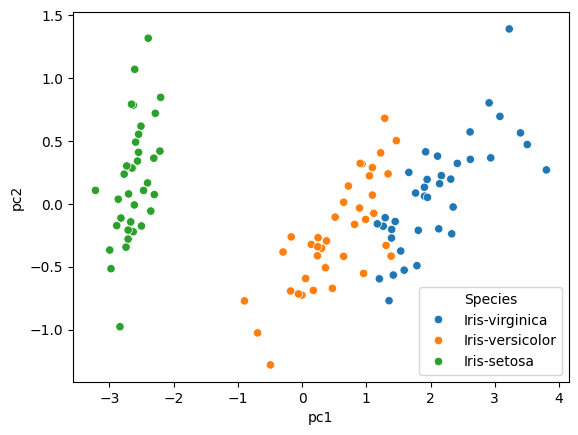

In [ ]:
# When we visualize it, we see a structure that is somewhere between
# the extreme examples of species separation in the pair plot.
# That is, Iris-setosa exists as a group separate from the rest (as is usually
# the case in column visualizations). In contrast, Iris-virginica and Iris-versicolor
# together are a separate group that is partially blended together. It is neither
# fully separable or completely blended together.
#
# Spend some time looking at this visualization and all the visualizations in the
# pair plot and see if this plot makes sense to you as a kind of summary or
# generalized view into the column data.
#
# A note - the axes do not align with any specific column!
sns.scatterplot(df, x='pc1', y='pc2', hue='Species')